### **Решение уравнения переноса**

##### Заданием данной лабораторной работы является разработка программы, осуществляющей поиск численного решения для уравнения переноса:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} + a \cdot \frac{\partial u}{\partial x} = f(t, x) , \:\:\: 0 \leq t \leq T, \:\:\: 0 \leq x \leq X
    \\
    u(x, 0) = \varphi(x), \:\:\: 0 \leq x \leq X
    \\
    u(0, t) = \psi(t), \:\:\: 0 \leq t \leq T
 \end{cases}
\end{equation*}
$$

##### Для решения задачи используется равномерная сетка с шагами τ по времени и h по координате. 

##### Функция $u(t,x)$ рассматривается в точках $t=k\tau$,  $x=mh$,  $0 \leq k \leq K$, $\leq m \leq M$,  $T=K\tau$,  $X=Mh$.


##### Для поиска решения использовать явная центральная трехточечная схема:

##### Разностная схема записывается следующим образом:

$$
\begin{equation*}
   \frac{1}{\tau} u_{m}^{k+1} - \frac{1}{2\tau}(u_{m + 1}^{k} + u_{m - 1}^{k}) + \frac{1}{2h}(u_{m + 1}^{k} - u_{m - 1}^{k}) = f_{m}^{k}
\end{equation*}
$$

##### Значение на временное слое k + 1 рассчитываем с учетом слоя k:

$$
\begin{equation*}
   u_{m}^{k+1} = \frac{1}{2}(u_{m + 1}^{k} + u_{m - 1}^{k}) - \frac{\tau}{2h}(u_{m + 1}^{k} - u_{m - 1}^{k}) + \tau f_{m}^{k}, \:\:\: k = \overline{0, K-1}, \:\: m = \overline{0, M - 1}  
\end{equation*}
$$

##### В точке $x = X$ воспользуемся схемой "явный левый уголок":

$$
\begin{equation*}
   u_{m}^{k+1} = u_{m}^{k} - \frac{\tau}{h} \cdot (u_{m}^{k} - u_{m - 1}^{k}) + \tau\cdot f_{m}^{k}, \:\:\: k = \overline{0, K-1}, \:\: m = M 
\end{equation*}
$$

##### Порядок аппроксимации: $O(\frac{h^{2}}{\tau} + \tau + h^{2})$
##### Cхема устойчива при $\frac{\tau}{h} \leq 1$


In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [21]:
tau = 1e-3
h = 1e-3

T = X = 1

x_steps = int(X / h)
t_steps = int(T / tau)

In [22]:
def phi(x):
    return np.cos(np.pi * x)

def psi(t):
    return np.exp(-t)

def f(x, t):
    return x + t

In [23]:
def solve_eq():
    data = np.zeros((t_steps, x_steps))

    for t in range(t_steps):
        data[t][0] = psi(t * tau)

    for x in range(x_steps):
        data[0][x] = phi(x * h)
    
    for t in range(1, t_steps):
        for x in range(1, x_steps):
            if (x == x_steps - 1):
                data[t][x] =  data[t-1][x] - (tau / h) * (data[t-1][x] - data[t-1][x - 1]) + tau * f(x * h, (t - 1) * tau)
            else:
                data[t][x] = 0.5 * (data[t-1][x + 1] + data[t-1][x - 1]) - (tau / 2*h) * (data[t-1][x + 1] - data[t-1][x - 1]) + tau * f(x * h, (t - 1) * tau)  
    return data

def plot(u):
    x = np.arange(start=0, stop=X, step=h)
    t = np.arange(start=0, stop=T, step=tau)

    x, t = np.meshgrid(x, t)

    fig = plt.figure(figsize=(15, 15))
    graph = plt.axes(projection='3d')

    surf = graph.plot_surface(x, t, u, cmap=cm.plasma)
    graph.set_xlabel("x", fontsize=20)
    graph.set_ylabel("t", fontsize=20)

    graph.set_zlabel("u(x, t)", fontsize=20)

    fig.colorbar(surf, shrink=0.5)

    plt.grid()
    plt.show()


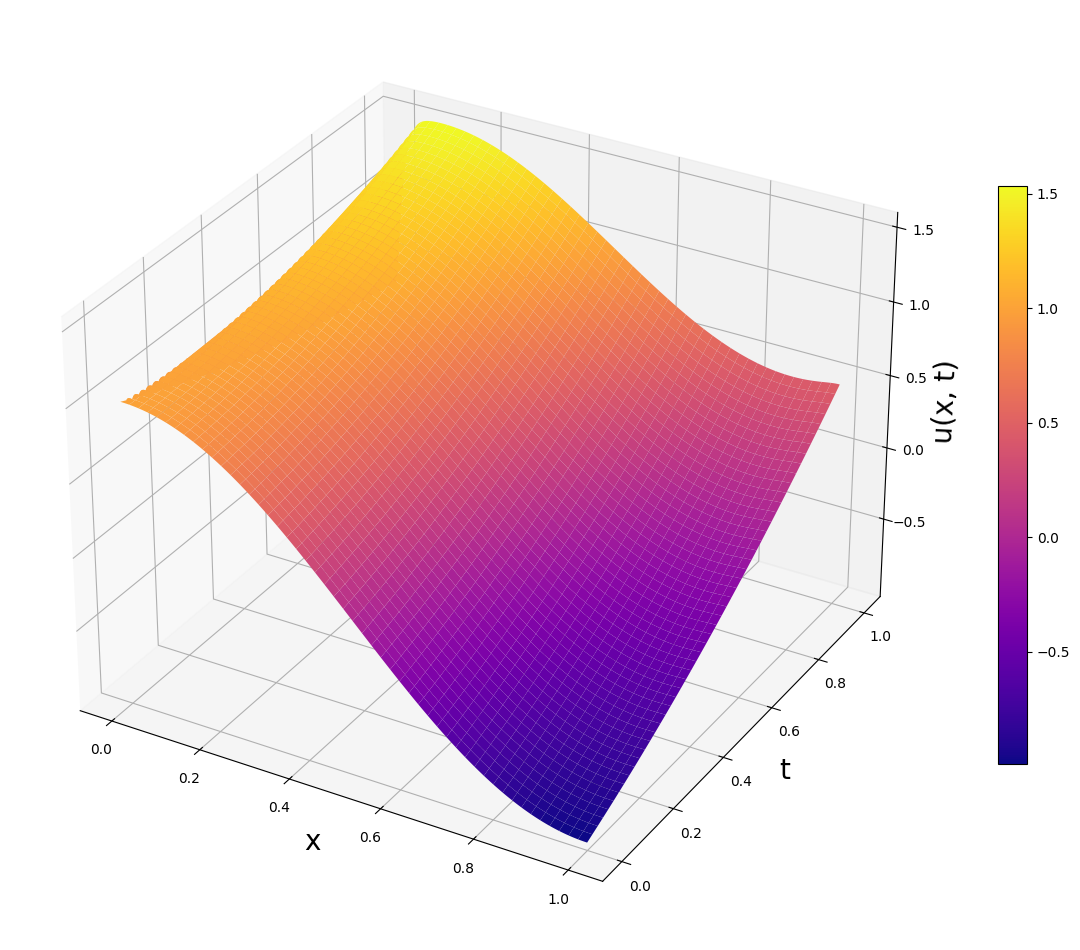

In [17]:
plot(solve_eq())

### Сравнение решения с аналитическим

Программа численно решает задачу переноса:
$$
\begin{cases}
    \frac{\partial u (t, x)}{\partial t} + a \frac{\partial u(t, x)}{\partial x} = x + t, \ 0 \le t \le T, 0 \le x \le X \\
    u(0, x) = \cos(\pi x) \\
    u(t, 0) = \exp(-t)
\end{cases}
$$
Конечно-разностная схема крест:
$$
\frac{u^{k+1}_m - u^{k-1}_m}{2 \tau} + \frac{u^k_{m+1} - u^k_{m-1}}{2 h} = f^k_m
$$
Аналитическое решение задачи Коши:
$$
u(t, x) = \begin{cases}
                xt - \frac{t^2}{2} + \cos(\pi(2t - x)), \ 2t \le x \\
                xt - \frac{t^2}{2} + \frac{(2t - x)^2}{8} + \exp(-(t - \frac{x}{2})), \ 2t > x
          \end{cases}
$$

In [18]:
def solv_analytical():
    data = np.zeros((t_steps, x_steps))
    for t_index, t in enumerate(np.linspace(0, 1, t_steps)):
        for x_index, x in enumerate(np.linspace(0, 1, x_steps)):
            if (2 * t <= x):
                data[t_index][x_index] = x * t - t ** 2 / 2 + np.cos(np.pi * (2 * t - x))
            else:
                data[t_index][x_index] = x * t - t ** 2 / 2 + (2 * t - x) ** 2 / 8 + np.exp(-(t - x / 2))
    return data
solv_analytical()

array([[ 1.        ,  0.99999506,  0.99998022, ..., -0.99998022,
        -0.99999506, -1.        ],
       [ 0.9989995 ,  0.99950025,  1.0000015 , ..., -0.99892239,
        -0.998956  , -0.99897972],
       [ 0.998     ,  0.99850075,  0.999002  , ..., -0.99782601,
        -0.99787839, -0.99792089],
       ...,
       [ 0.36861667,  0.36930084,  0.36998534, ...,  1.2296381 ,
         1.23069143,  1.23174515],
       [ 0.36824787,  0.36893235,  0.36961717, ...,  1.22953016,
         1.23058368,  1.2316376 ],
       [ 0.36787944,  0.36856424,  0.36924938, ...,  1.22942283,
         1.23047654,  1.23153066]])

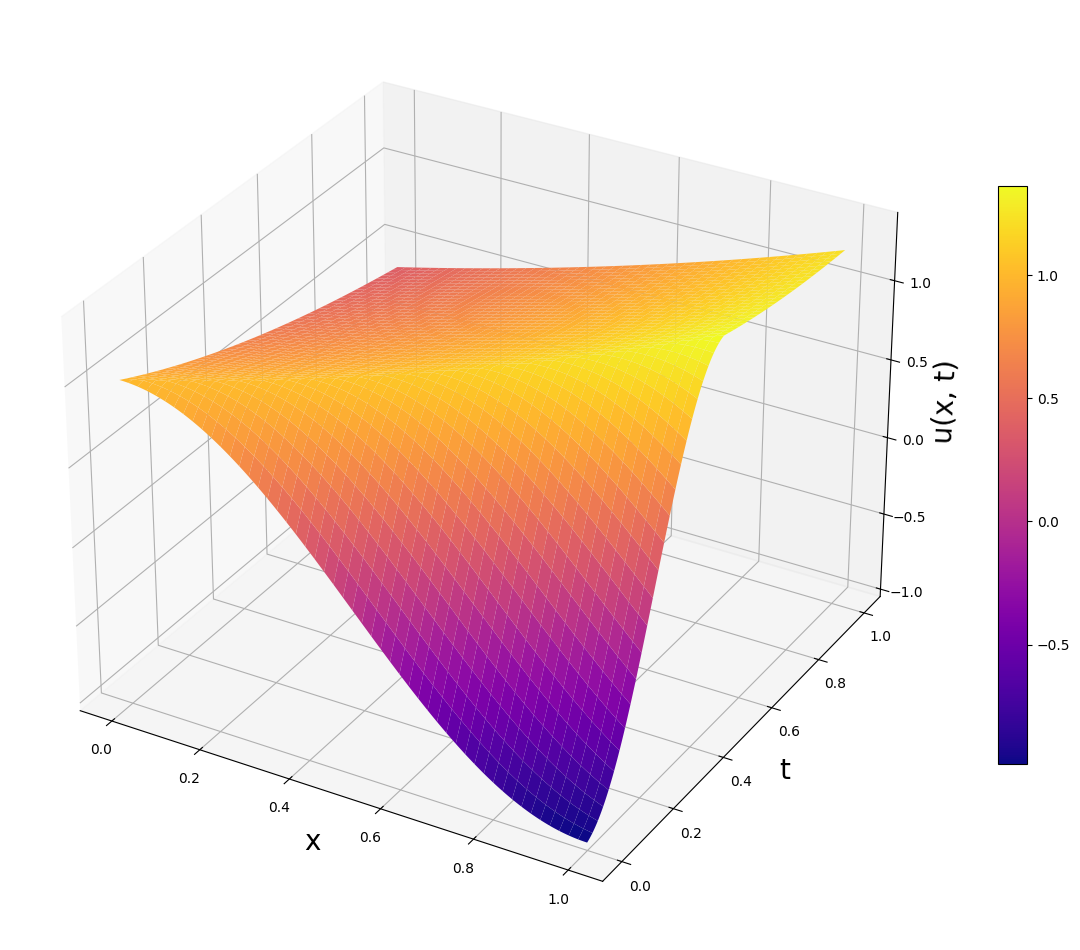

In [19]:
plot(solv_analytical())